In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM, Dropout, Activation, BatchNormalization, LayerNormalization
from tensorflow.keras.models import Sequential


In [21]:
df = pd.read_csv("train.csv")

In [22]:
df.drop("date_time",axis=1,inplace=True)


FileNotFoundError: ignored

In [56]:
test = pd.read_csv("test .csv")
ind = test["date_time"]
test.drop("date_time",axis=1,inplace=True)

In [4]:
df.head()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


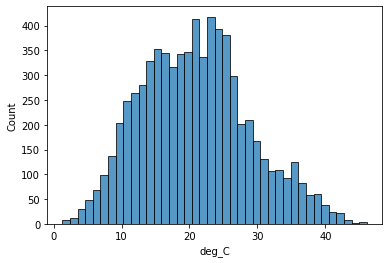

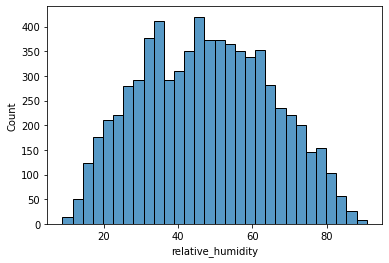

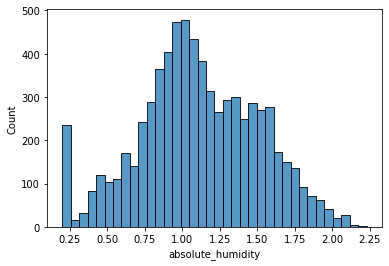

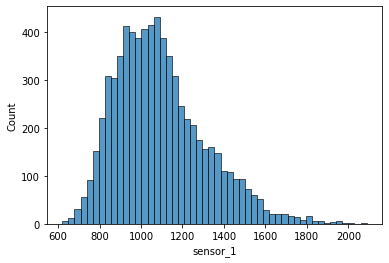

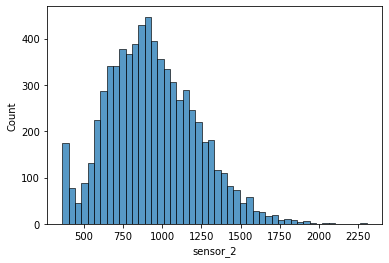

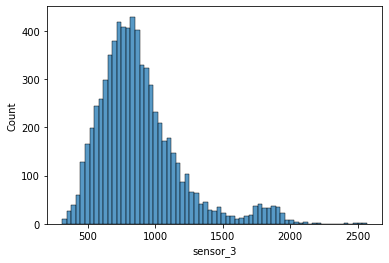

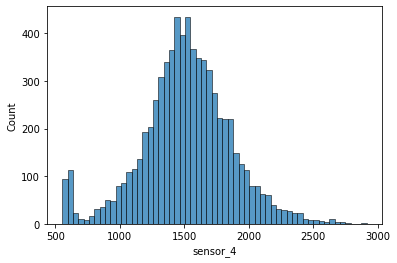

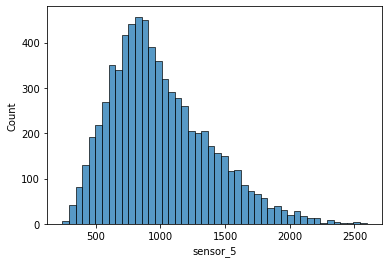

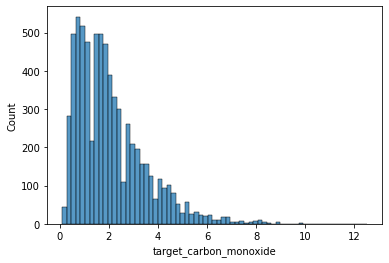

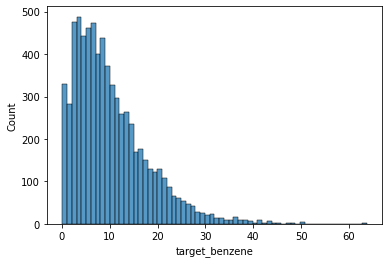

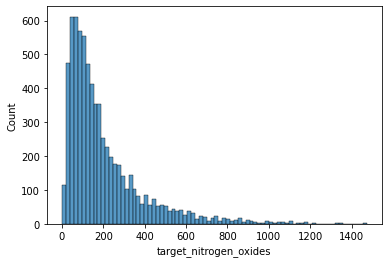

In [5]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

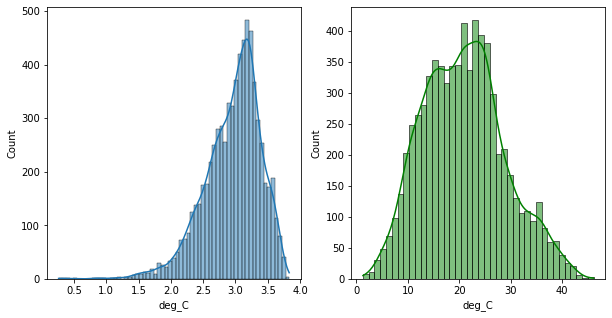

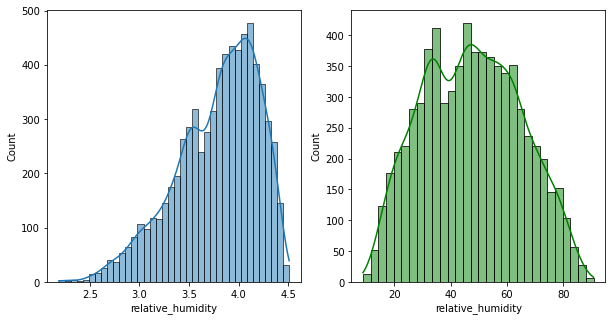

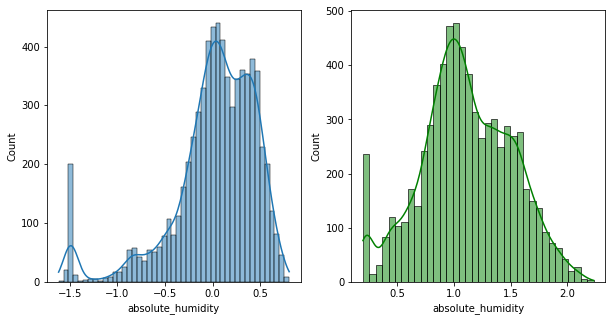

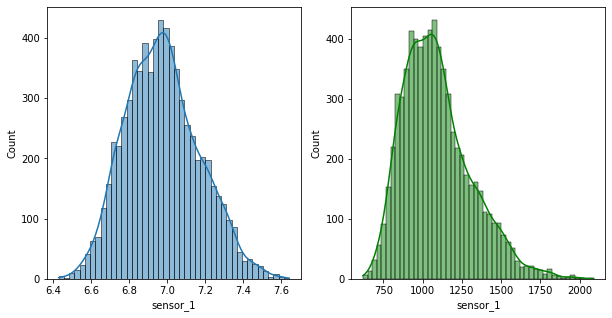

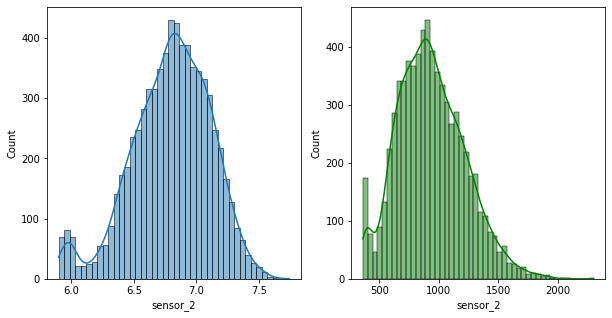

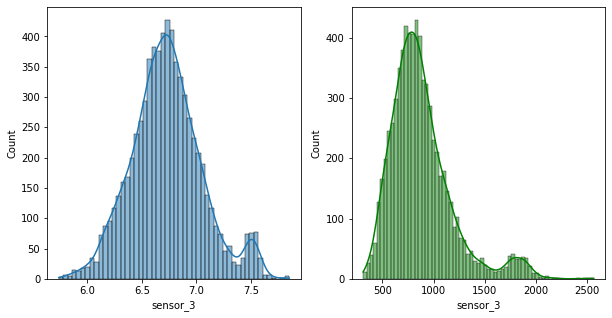

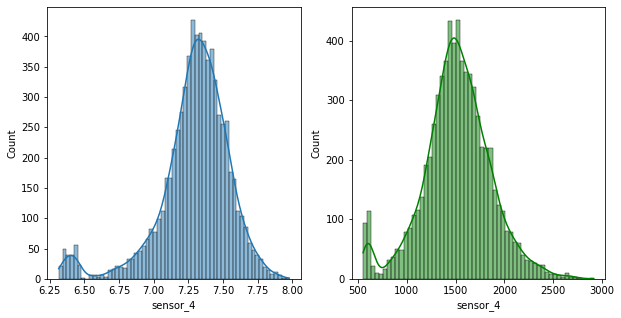

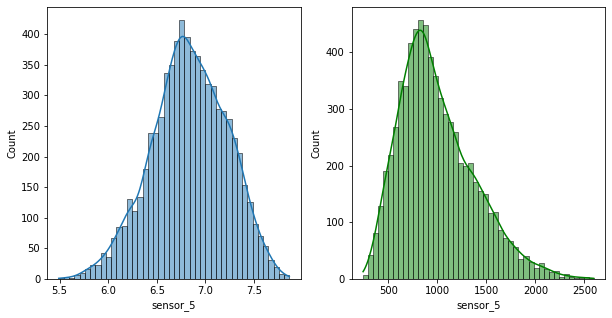

In [6]:
df1 = np.log(df[:-3])
for i in df1.columns[:-3]:
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    sns.histplot(x=i,data=df1,kde=True,ax=ax[0])  
    sns.histplot(x=i,data=df,color="green",kde=True,ax=ax[1])
    # plt.legend()
    plt.show()

In [23]:
model = Sequential()                # could make units 50, for better prediction
# model.add(LayerNormalization())     # Normalizing the input data 
# First LSTM layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(8,1),activation="relu",unroll=True))
# model.add(Dropout(0.1))    # Removing some of the data from the previous layer to avoid overfitting
model.add(BatchNormalization())
model.add(LSTM(units=50, activation="relu",unroll=True,return_sequences=True))#, return_sequences=True))    # Second LSTM Layer
# model.add(Dropout(0.1))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.1))
model.add(Activation(activation="relu"))
model.add(BatchNormalization())
model.add(LSTM(units=50))
# model.add(Dropout(0.1))
model.add(BatchNormalization())
## 
# model.add(Dropout(0.1))
# model.add(LSTM(units=50,activation="relu"))
# model.add(Dense(units=500, activation="relu"))
# model.add(Dropout(0.2))

model.add(Dense(units=1,activation='linear'))  # Final LSTM Layer of unit=1, cause we have just one Output, that is, Closing Price
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1))   # Compiling, optimizer and loss can be changed to optimize the model for our specific purpose
model.fit(np.array(df.iloc[:,:-3]).reshape(7111,-1,1),np.array(df["target_carbon_monoxide"]).reshape(-1,1), epochs=10, batch_size=100)

Epoch 1/10
72/72 [==============================] - 15s 49ms/step - loss: 1.2884
Epoch 2/10
72/72 [==============================] - 4s 49ms/step - loss: 0.4788
Epoch 3/10
72/72 [==============================] - 3s 48ms/step - loss: 0.1783
Epoch 4/10
72/72 [==============================] - 3s 48ms/step - loss: 0.1600
Epoch 5/10
72/72 [==============================] - 3s 47ms/step - loss: 0.1507
Epoch 6/10
72/72 [==============================] - 3s 48ms/step - loss: 0.1473
Epoch 7/10
72/72 [==============================] - 3s 48ms/step - loss: 0.1360
Epoch 8/10
72/72 [==============================] - 3s 48ms/step - loss: 0.1283
Epoch 9/10
72/72 [==============================] - 3s 47ms/step - loss: 0.1251
Epoch 10/10
72/72 [==============================] - 3s 49ms/step - loss: 0.1254


In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(model.predict(np.array(df.iloc[:,:-3]).reshape(7111,-1,1)),np.array(df["target_carbon_monoxide"]).reshape(-1,1),squared=False)

0.5376047620606101

In [29]:
test.drop(["date_time"],axis=1,inplace=True)

In [45]:
model.predict(np.array(test).reshape(np.array(test).shape[0],-1,1)).shape

(2247, 1)

In [48]:
y_pred1 = []
y_pred1 = model.predict(np.array(test).reshape(np.array(test).shape[0],-1,1))

In [49]:
model.fit(np.array(df.iloc[:,:-3]).reshape(7111,-1,1),np.array(df["target_benzene"]).reshape(-1,1), epochs=10, batch_size=100)
y_pred2=[]
y_pred2 = model.predict(np.array(test).reshape(np.array(test).shape[0],-1,1))

Epoch 1/10
72/72 [==============================] - 3s 48ms/step - loss: 5.7113
Epoch 2/10
72/72 [==============================] - 3s 48ms/step - loss: 1.2804
Epoch 3/10
72/72 [==============================] - 4s 49ms/step - loss: 0.8164
Epoch 4/10
72/72 [==============================] - 4s 49ms/step - loss: 0.7920
Epoch 5/10
72/72 [==============================] - 4s 50ms/step - loss: 0.7565
Epoch 6/10
72/72 [==============================] - 4s 49ms/step - loss: 0.7685
Epoch 7/10
72/72 [==============================] - 3s 48ms/step - loss: 0.7475
Epoch 8/10
72/72 [==============================] - 3s 48ms/step - loss: 0.7348
Epoch 9/10
72/72 [==============================] - 3s 48ms/step - loss: 0.7797
Epoch 10/10
72/72 [==============================] - 4s 49ms/step - loss: 0.7390


In [50]:
model.fit(np.array(df.iloc[:,:-3]).reshape(7111,-1,1),np.array(df["target_nitrogen_oxides"]).reshape(-1,1), epochs=10, batch_size=100)
y_pred3=[]
y_pred3 = model.predict(np.array(test).reshape(np.array(test).shape[0],-1,1))

Epoch 1/10
72/72 [==============================] - 4s 50ms/step - loss: 190.3777
Epoch 2/10
72/72 [==============================] - 3s 48ms/step - loss: 180.5443
Epoch 3/10
72/72 [==============================] - 3s 48ms/step - loss: 167.4052
Epoch 4/10
72/72 [==============================] - 3s 47ms/step - loss: 151.6579
Epoch 5/10
72/72 [==============================] - 4s 49ms/step - loss: 134.0886
Epoch 6/10
72/72 [==============================] - 3s 48ms/step - loss: 116.0171
Epoch 7/10
72/72 [==============================] - 4s 49ms/step - loss: 98.1892
Epoch 8/10
72/72 [==============================] - 4s 50ms/step - loss: 82.1705
Epoch 9/10
72/72 [==============================] - 4s 49ms/step - loss: 70.8946
Epoch 10/10
72/72 [==============================] - 4s 50ms/step - loss: 61.3057


In [78]:
final = pd.DataFrame({"date_time":np.array(ind).reshape(-1), "target_nitrogen_oxides":y_pred3.reshape(-1), "target_benzene":y_pred2.reshape(-1), "target_carbon_monoxide":y_pred1.reshape(-1)})

In [79]:
final.to_csv("submission.csv")

In [77]:
import os,io,sys,setuptools, tokenize
!pip install -q kaggle
!pip install -q kaggle-cli
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp "kaggle.json" ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-60mmvr6f/lxml_ef60031415264101a4dd2736c19762b1/setup.py'"'"'; __file__='"'"'/tmp/pip-install-60mmvr6f/lxml_ef60031415264101a4dd2736c19762b1/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-g50g523v/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/lxml Check the logs for full command output.
  Using cached kaggle-1.5.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')